# Decoding Startup Success: An Analytical Approach to Understanding What Drives Startup Outcomes

Welcome to my exploration where we find the dynamics of startup success and failure through a detailed dataset having various startup characteristics.
<br>
This notebook is actually a copy of a draft version. This one is more polished, and I have run all of the codes.<br>
 This notebook is structured to guide you through my analysis process, simplified into three main sections:
##1. Data vizualization
##2.Machine learning models
##3. Historical Analysis of Economic Impacts


# 1. Data vizualization
This section is dedicated to visually interpreting the data through plots, word clouds, and correlation matrices. My goal is to use these visual tools effectively to bring out hidden patterns and insights, making the data more accessible and understandable.


First of all let's load the files.(MIne are on my Google  Drive)


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Metric/data.csv', encoding='ISO-8859-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we use one of Google Colab's helpful tools - **Suggested Charts**. Yes, it can't give much insight into all the relationships of the data, but it's great to have something to start with. This is the simplest representation of our data. Then we will dive deeper.
<br><br>
P.S. you can scroll all the way down to see all the charts.
<br>&nbsp;   There was some issue with plotting the original data for Colab, so I edited it a bit by using the to_datetime() function of Pandas on the feature Est. Founding Date and setting errors='coerce' so it doesn't raise an exception.

### A little help from Colab

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
df_mod = df
df_mod['Est. Founding Date'] = pd.to_datetime(df_mod['Est. Founding Date'], errors='coerce')
df_mod


,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011,3,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
468,Company469,Failed,No Info,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
469,Company470,Failed,2010,4,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
470,Company471,Failed,2009,5,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info


from matplotlib import pyplot as plt
df['Age of company in years'].plot(kind='hist', bins=20, title='Age of company in years')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Internet Activity Score'].plot(kind='hist', bins=20, title='Internet Activity Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Employee Count'].plot(kind='hist', bins=20, title='Employee Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Employees count MoM change'].plot(kind='hist', bins=20, title='Employees count MoM change')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Dependent-Company Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Has the team size grown').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Continent of company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Presence of a top angel or venture fund in previous round of investment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age of company in years', y='Internet Activity Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Internet Activity Score', y='Employee Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Employee Count', y='Employees count MoM change', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Employees count MoM change', y='Last Funding Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Est. Founding Date']
  ys = series['Age of company in years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Est. Founding Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Dependent-Company Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Dependent-Company Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Est. Founding Date')
_ = plt.ylabel('Age of company in years')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Est. Founding Date']
  ys = series['Age of company in years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Est. Founding Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Has the team size grown')):
  _plot_series(series, series_name, i)
  fig.legend(title='Has the team size grown', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Est. Founding Date')
_ = plt.ylabel('Age of company in years')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Est. Founding Date']
  ys = series['Age of company in years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Est. Founding Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Continent of company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Continent of company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Est. Founding Date')
_ = plt.ylabel('Age of company in years')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Est. Founding Date']
  ys = series['Age of company in years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Est. Founding Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Presence of a top angel or venture fund in previous round of investment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Presence of a top angel or venture fund in previous round of investment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Est. Founding Date')
_ = plt.ylabel('Age of company in years')

from matplotlib import pyplot as plt
df['Age of company in years'].plot(kind='line', figsize=(8, 4), title='Age of company in years')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Internet Activity Score'].plot(kind='line', figsize=(8, 4), title='Internet Activity Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Employee Count'].plot(kind='line', figsize=(8, 4), title='Employee Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Employees count MoM change'].plot(kind='line', figsize=(8, 4), title='Employees count MoM change')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Has the team size grown'].value_counts()
    for x_label, grp in df.groupby('Dependent-Company Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dependent-Company Status')
_ = plt.ylabel('Has the team size grown')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Continent of company'].value_counts()
    for x_label, grp in df.groupby('Has the team size grown')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Has the team size grown')
_ = plt.ylabel('Continent of company')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Presence of a top angel or venture fund in previous round of investment'].value_counts()
    for x_label, grp in df.groupby('Continent of company')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Continent of company')
_ = plt.ylabel('Presence of a top angel or venture fund in previous round of investment')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Number of of repeat investors'].value_counts()
    for x_label, grp in df.groupby('Presence of a top angel or venture fund in previous round of investment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Presence of a top angel or venture fund in previous round of investment')
_ = plt.ylabel('Number of of repeat investors')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Dependent-Company Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age of company in years', y='Dependent-Company Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Has the team size grown'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age of company in years', y='Has the team size grown', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Continent of company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age of company in years', y='Continent of company', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Presence of a top angel or venture fund in previous round of investment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age of company in years', y='Presence of a top angel or venture fund in previous round of investment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Now let's make our own plots


### Data imputation
First of all we need to **fill the Nan values** .
But that's not that easy since we have some data types that might need specific approach, not the traditional mean/median imputation.

In [ ]:
df.replace('No Info', np.nan, inplace=True)#this is very important cause there was a lot of data with this values
null_percentages = df.isnull().mean() * 100
top_35_nulls = null_percentages.sort_values(ascending=False).head(35)

# lets print the top 35 columns with null values, and their null percentage
print(top_35_nulls)


Number of  of Partners of company                                                                                       81.567797
Employee benefits and salary structures                                                                                 74.364407
Number of  of Research publications                                                                                     70.762712
Top management similarity                                                                                               59.745763
Client Reputation                                                                                                       58.050847
Degree from a Tier 1 or Tier 2 university?                                                                              49.152542
Employees count MoM change                                                                                              43.432203
Gartner hype cycle stage                                                                  

* We have two features that have way too many null values. If we impute this features too we might get data that is not reliable. We should keep as much data as possible without losing integrity and reliablility.


In [ ]:
df.drop(['Number of  of Partners of company', 'Number of  of Research publications', 'Client Reputation', 'Top management similarity','Employee benefits and salary structures'  ], axis=1, inplace=True)


We will implement different methods of imputation for different kinds of data. This is all just my logical conclusions and one might choose another set of parameters with another methods.

#### KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
# I think this parameter can be better imputed using the data from its neighbors
knn_columns = ['Employees count MoM change']
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])


#### Multiple Imputation
This method works like this.It generates multiple versions of the dataset, each with slightly different imputed values for the missing entries. These differences are based on a distribution, not just random guesses, aiming to capture the natural variability of the data.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# since we have not only numbers that can be converted, but strings like this too "5 to 8", we need to address that issue too
def convert_range_to_midpoint(value):
    if isinstance(value, str) and 'to' in value:
        low, high = value.split(' to ')
        return (float(low) + float(high)) / 2
    try:
        return float(value)
    except ValueError:
        return np.nan  # we then convert unparseable strings to NaN for imputation

df['Time to maturity of technology (in years)'] = df['Time to maturity of technology (in years)'].apply(convert_range_to_midpoint)
multi_impute_columns = ['Time to maturity of technology (in years)', 'Employee Count']
iterative_imputer = IterativeImputer()
df[multi_impute_columns] = iterative_imputer.fit_transform(df[multi_impute_columns])


#### Model based imputation
Next, we will attempt to impute Last Funding Amount by building **a stacked model** and see if we can gain some information from data that can help us for filling null values . We will also use *'Internet Activity Score', 'Age of company in years'* to make predictions based on this parameters and we should impute this parameters too. But theres an obvious question. If we impute some features and then make predictions based on that data doesnt that impose some risks of making some false predictions. As the amount of the null values in these features is small, the risk is small and we might get better, not worse results from this, as we will see.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# lets convert 'no info' to Nan
df[['Internet Activity Score', 'Age of company in years']] = df[['Internet Activity Score', 'Age of company in years']].replace('No Info', np.nan)
# non-numeric entries are NaN and can be imputed
df['Internet Activity Score'] = pd.to_numeric(df['Internet Activity Score'], errors='coerce')
df['Age of company in years'] = pd.to_numeric(df['Age of company in years'], errors='coerce')

# applying median imputation
median_imputer = SimpleImputer(strategy='median')
df[['Internet Activity Score', 'Age of company in years']] = median_imputer.fit_transform(df[['Internet Activity Score', 'Age of company in years']])

# mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_columns = ['Last Funding Date', 'Est. Founding Date', 'Specialization of highest education', 'Continent of company', 'Country of company']
df[mode_columns] = mode_imputer.fit_transform(df[mode_columns])


In [ ]:
missing_values_count = df['Last Funding Amount'].isnull().sum()
print(f"Missing values in 'Last Funding Amount': {missing_values_count}")

Missing values in 'Last Funding Amount': 160


In [ ]:
df_modif =df

In [ ]:
df = df_modif


In [ ]:
import pandas as pd
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

features = ['Internet Activity Score', 'Age of company in years', 'Employee Count', 'Employees count MoM change']
dataset_with_funding = df[df['Last Funding Amount'].notnull()][features + ['Last Funding Amount']]

X = dataset_with_funding[features]
y = dataset_with_funding['Last Funding Amount']
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

outlier_mask = y_train_full <= 50000000 # we dont want the model to be affected by outliers (theres not that much startups which raised more than 50M)
X_train = X_train_full[outlier_mask]
y_train = y_train_full[outlier_mask]
# let's build a model that will try to predict the value of Last Funding Amount
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('poly', make_pipeline(PolynomialFeatures(degree=3), LinearRegression()))
]

final_estimator = LinearRegression()
stacked_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
#lets create a function that will help us evaluate the result compared with other methods on the validation dataset
def evaluate_model(X_train, y_train, X_val, y_val, strategy='median'):
    if strategy in ['mean', 'median', 'most_frequent']:
        imputer = SimpleImputer(strategy=strategy)
    elif strategy == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
    else:
        stacked_model.fit(X_train, y_train)
        y_pred = stacked_model.predict(X_val)
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        return rmse

    if strategy in ['mean', 'median', 'most_frequent', 'knn']:
        X_train_imputed = imputer.fit_transform(X_train)
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_val)

    rmse = sqrt(mean_squared_error(y_val, y_pred))
    return rmse

strategies = ['mean', 'median', 'most_frequent', 'knn', 'stacked']
results = {}
for strategy in strategies:
    rmse = evaluate_model(X_train, y_train, X_val, y_val, strategy=strategy)
    results[strategy] = rmse

for strategy, rmse in results.items():
    print(f"RMSE with {strategy.title()} Imputation: {rmse}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


RMSE with Mean Imputation: 11076634.325615967
RMSE with Median Imputation: 11076634.325615967
RMSE with Most_Frequent Imputation: 11076634.325615967
RMSE with Knn Imputation: 11033463.477440082
RMSE with Stacked Imputation: 12304008.346270602


 **Honestly, the results aren't that impressive right?**


Nevertheless, we will impute the data using KNN imputation

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_columns = ['Last Funding Amount']
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])

### Median and mode imputation
Yes, we have used it before but it was for our stacked model features. Now we impute the other parameters using median and mode too and then check if there are any null values.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# median imputation for unmerical columns
median_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = median_imputer.fit_transform(df[numerical_cols])

# mode imputation for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = mode_imputer.fit_transform(df[categorical_cols])


In [ ]:
null_percentages = df.isnull().mean() * 100
top_5_nulls = null_percentages.sort_values(ascending=False).head(5)

# lets print the top 5 columns with null values, and their null percentage
print(top_5_nulls)


Company_Name                                      0.0
Skills score                                      0.0
Legal risk and intellectual property              0.0
Controversial history of founder or co founder    0.0
Company awards                                    0.0
dtype: float64


### Distribution of Internet Activity Score and Age of company by Company Status

First of all lets examine how much is the imbalance between the count of successful and failed startups.
Also we can plot the distributions of Internet Activity Score and Age of Company by company status (i.e. failed or successful).  

<ipython-input-57-f5d3e7e12315>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependent-Company Status', data=df, palette='Set2')


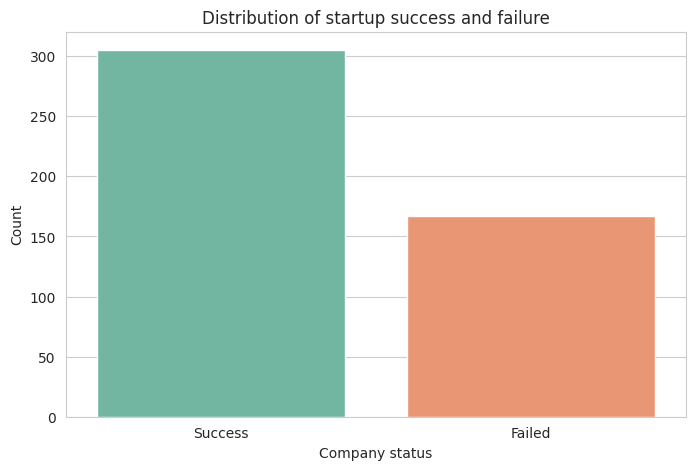

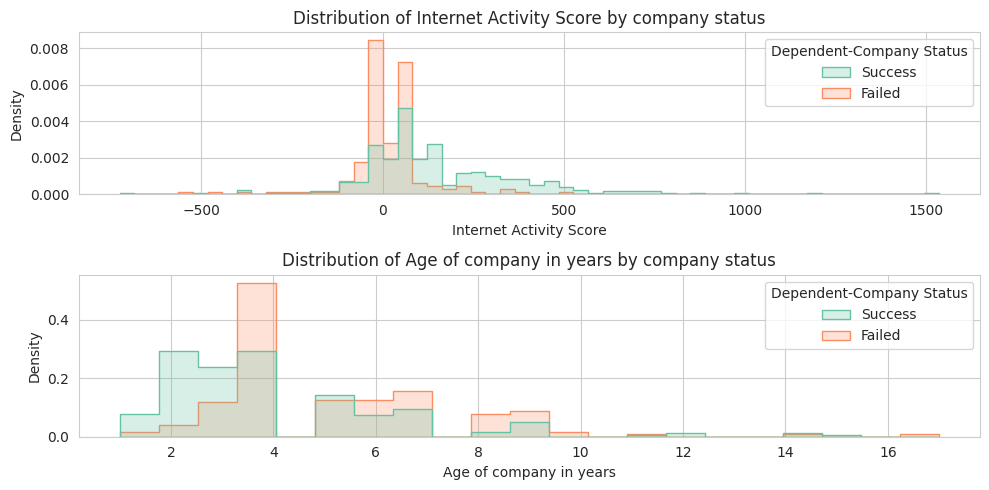

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='Dependent-Company Status', data=df, palette='Set2')
plt.title('Distribution of startup success and failure')
plt.xlabel('Company status')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10, 5))
for index, feature in enumerate(['Internet Activity Score', 'Age of company in years'], start=1):
    plt.subplot(2, 1, index)
    sns.histplot(data=df, x=feature, hue='Dependent-Company Status', element='step', stat='density', common_norm=False, palette='Set2')
    plt.title(f'Distribution of {feature} by company status')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()




*   We can clearly see that there's a notable imbalance in the dataset.
*   We see a notable difference between successful and failed startups when compared by internet activity score, suggesting that higher internet activity might be associated with success.
*  There's some overlap in the age distributions of successful and failed startups,but it's also noticeable that companies across different ages can achieve success, but there might be a slight tendency for younger companies to fail



### Now let's do some correlation analysis

The correlation matrix among numerical features

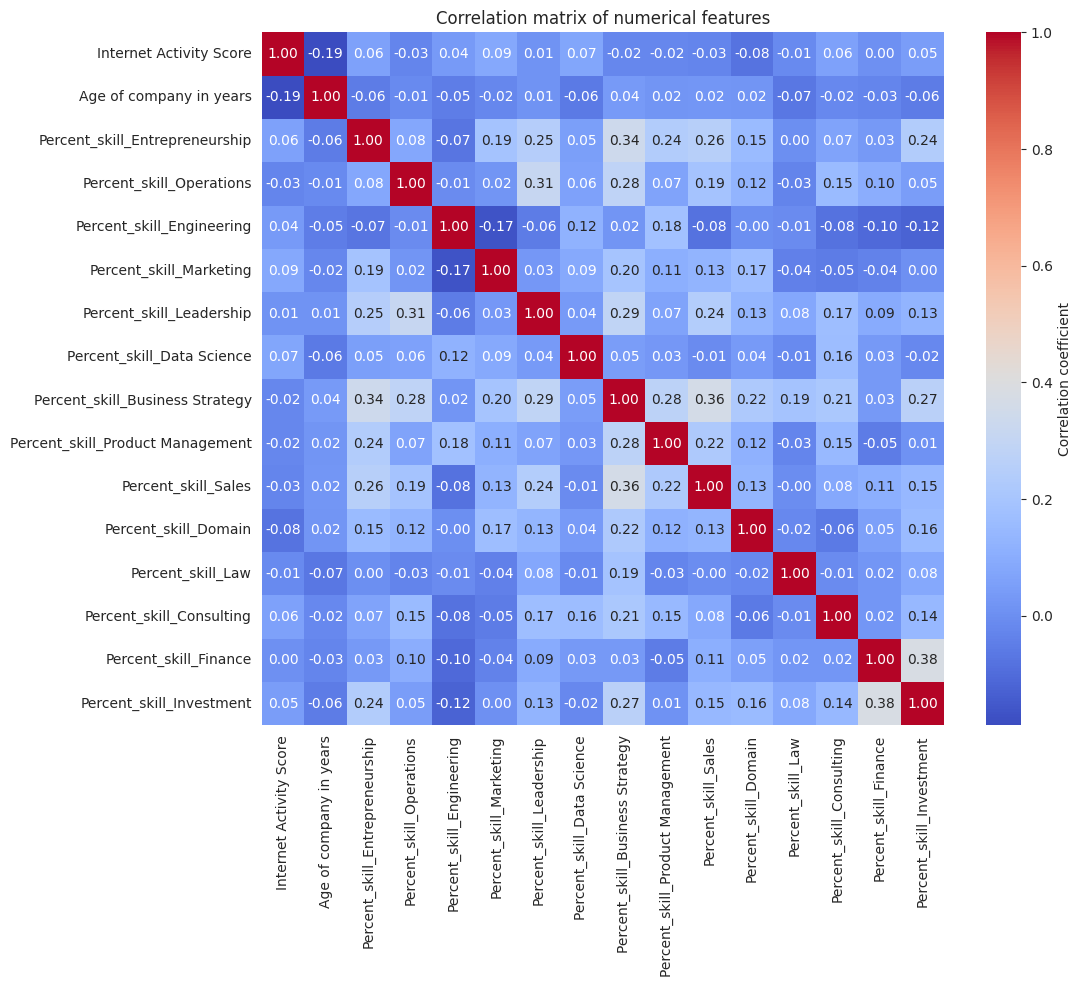

In [ ]:
percent_skill_columns = [col for col in df.columns if col.startswith('Percent_skill_')]
numerical_features = ['Internet Activity Score', 'Age of company in years'] + percent_skill_columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation matrix of numerical features')
plt.show()

* The correlation matrix among numerical features, including "Internet Activity Score," "Age of company in years," and various "Percent_skill_" metrics, reveals generally low to moderate correlations among these variables

#### Lets look at this another way
&nbsp;As we have seen there's low correlation between these variables
After opening the dictionary.csv it's easy to see that there are a lot of parameters that have this description 'for founders & cofounders'. These are features that should have correlation with the failure/success of our startups.
<br>&nbsp; Lets determine how strongly each founder-related feature is associated with company success or failure. This will help us identify which founder attributes, if any, play a significant role in determining a startup's outcome.

In [ ]:
# loading dictionary.csv to select founder & cofounder  features
dictionary = pd.read_csv('/content/drive/My Drive/Metric/dictionary.csv', encoding='ISO-8859-1')
founder_features_dict = dictionary[dictionary['Description'].str.contains("for founders & cofounders", na=False)]
founder_features_dict_list = founder_features_dict['Variable'].tolist()
features_that_were_removed = ['Number of  of Partners of company', 'Number of  of Research publications', 'Client Reputation', 'Top management similarity','Employee benefits and salary structures'  ]

# let's update founder_features_dict_list by removing the unwanted features
founder_features_dict_list = [feature for feature in founder_features_dict_list if feature not in features_that_were_removed]

# filtering dataset
founder_features_data = df[founder_features_dict_list + ['Dependent-Company Status']]
# Encoding categorical variables
founder_features_data_encoded = pd.get_dummies(founder_features_data, drop_first=True)
# correlation matrix
correlation_matrix_founders = founder_features_data_encoded.corr()
# correlations of the founder features with Dependent-Company Status
target_variable_encoded = [col for col in founder_features_data_encoded.columns if 'Success' in col][0]
correlation_with_target_founders = correlation_matrix_founders[[target_variable_encoded]].sort_values(by=target_variable_encoded, ascending=False)
correlation_with_target_founders[1:6]

,Dependent-Company Status_Success
Experience in Fortune 100 organizations_1,0.257295
Experience in Fortune 500 organizations_1,0.245632
Average size of companies worked for in the past_Medium,0.228085
Experience in Fortune 1000 organizations_1,0.219945
Highest education_Masters,0.164552




**The correlation analysis with the corrected founder-specific features reveals several interesting insights.**
* A significant positive correlation suggests that founders or co-founders who have experience in fortune 100, 500 or 1000 organizations are more likely to lead successful startups
* Also there's some correlation when   the average size of companies worked for in the past was medium (the _medium is a result of one hot encoding)
* A positive correlation supports the idea that  educational backgrounds of founders and co-founders contribute positively to startup success.





#### Some more plots

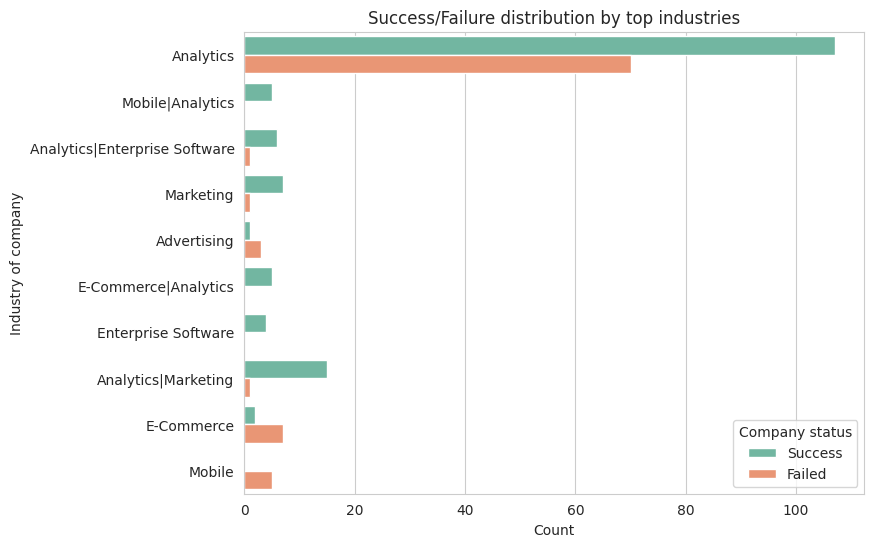

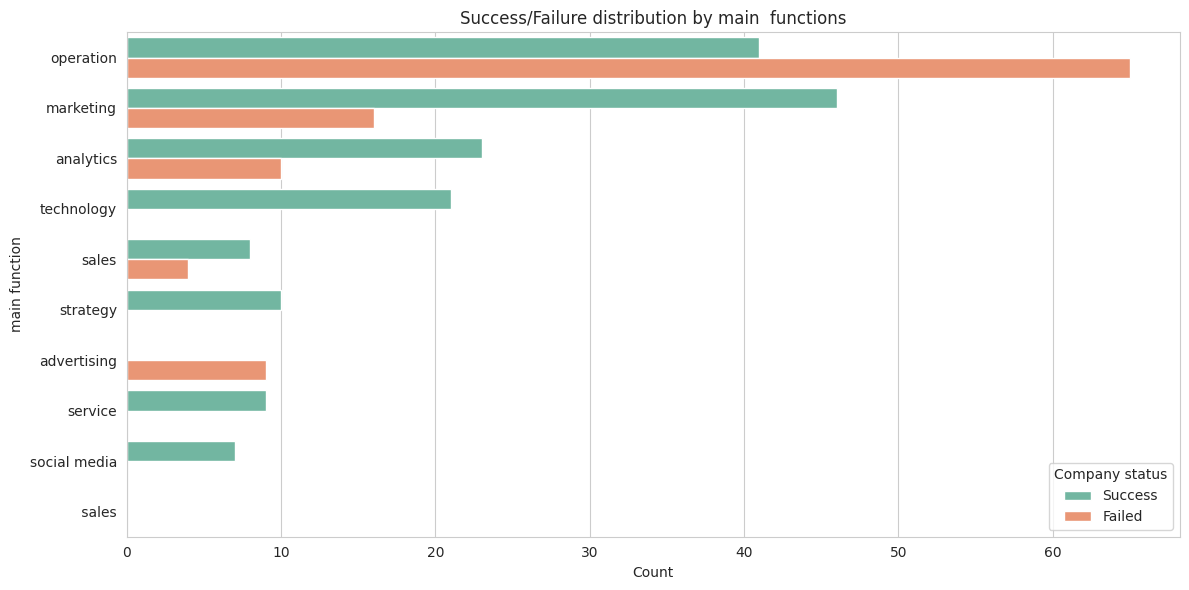

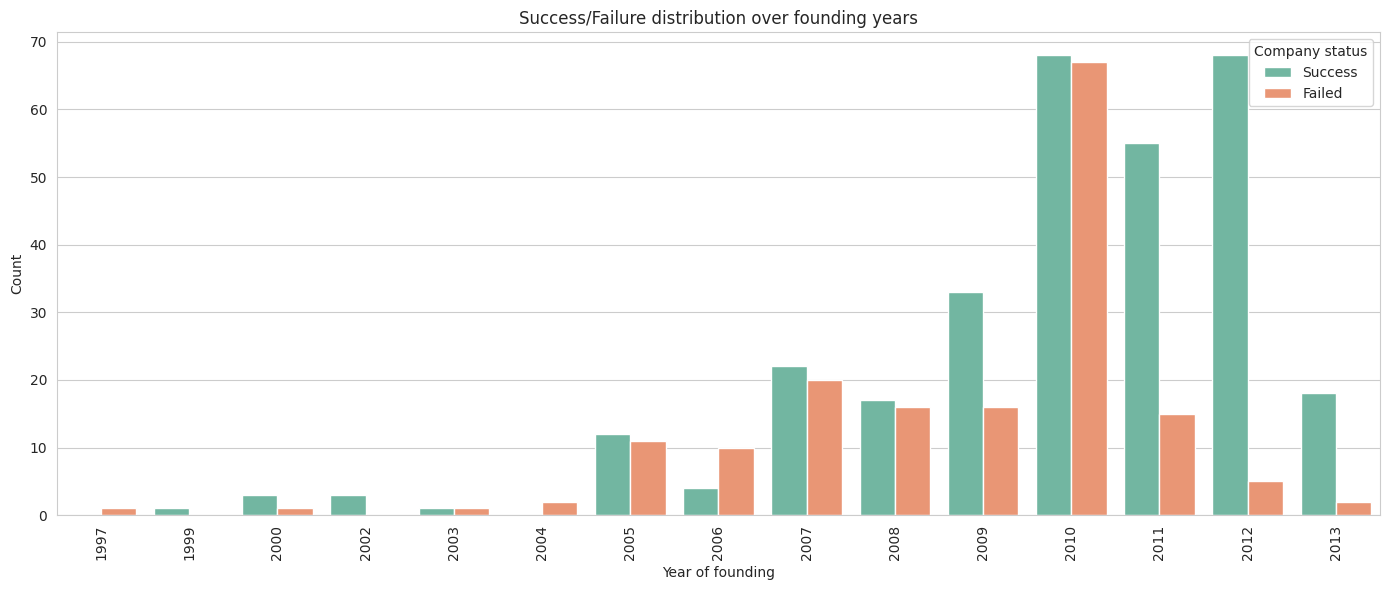

In [ ]:
# let's analyze if there is connection between the industries and the startups that are involved
top_industries = df['Industry of company'].value_counts().head(10).index.tolist()
data_top_industries = df[df['Industry of company'].isin(top_industries)]
plt.figure(figsize=(8, 6))
sns.countplot(y='Industry of company', hue='Dependent-Company Status', data=data_top_industries, palette='Set2')
plt.title('Success/Failure distribution by top industries')
plt.xlabel('Count')
plt.ylabel('Industry of company')
plt.legend(title='Company status')
plt.show()
print()


# Focus Functions of Company Analysis
# Since 'Focus functions of company' can contain multiple functions per company, let's examine the top focus functions
# little tweaks that wil clear up the graph
df['Focus functions of company'] = df['Focus functions of company'].str.lower()
df['Focus functions of company'] = df['Focus functions of company'].str.replace('operations', 'operation')

main_functions_counts = df['Focus functions of company'].str.get_dummies(sep=',').sum().sort_values(ascending=False).head(10)
top_main_functions = main_functions_counts.index.tolist()
# Filtering data for visual analysis of main functions of that company
main_functions_data = df[df['Focus functions of company'].notnull()]
main_functions_data = main_functions_data[main_functions_data['Focus functions of company'].apply(lambda x: any(func in x for func in top_main_functions))]

# Visualizing success/failure distribution for main functions
plt.figure(figsize=(12, 6))
sns.countplot(y='Focus functions of company', hue='Dependent-Company Status', data=main_functions_data, palette='Set2', order=top_main_functions)
plt.title('Success/Failure distribution by main  functions')
plt.xlabel('Count')
plt.ylabel('main function')
plt.legend(title='Company status', loc='lower right')
plt.tight_layout()
plt.show()
print()

# Year of founding analysis
# Plotting success/failure distribution over the founding years
plt.figure(figsize=(14, 6))
sns.countplot(x='year of founding', hue='Dependent-Company Status', data=df, palette='Set2', order=sorted(df['year of founding'].unique()))
plt.title('Success/Failure distribution over founding years')
plt.xticks(rotation=90)
plt.xlabel('Year of founding')
plt.ylabel('Count')
plt.legend(title='Company status')
plt.tight_layout()
plt.show()




*   The companies mainly focused in analytics **and other spheres** seemed to have less failures.
* The companies mainly focused on marketing and technology were more successful
* The companies founded in 2011 or later were more successful. **(This topic will be  discussed more in the 3rd chapter.)**
<br> P.S. Note that this plot is done on already imputed data but these features dont change that much.


### NLP analysis of the "Short Description of company profile"

To focus on the NLP analysis of the "Short Description of company profile", we will:

* Extract valid descriptions from the dataset.
* Create a WordCloud to visualize common words and phrases within these descriptions.

<ipython-input-62-bf98c2540ccb>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Processed_Description'] = data['Short Description of company profile'].fillna('').apply(lambda x: preprocess_text(x, stopwords_list))


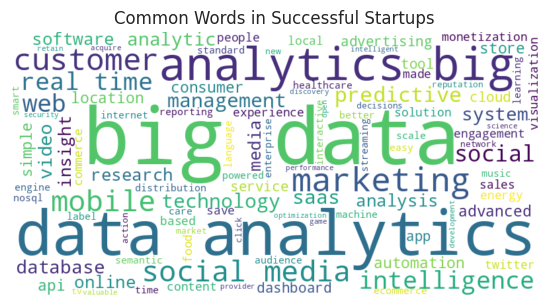

In [ ]:
from wordcloud import WordCloud
data = df
stopwords_list = {'and', 'to', 'of', 'a', 'in', 'for', 'that', 'on', 'with', 'as', 'by', 'are', 'it', 'is', 'this', 'which', 'be', 'or', 'from', 'at', 'an', 'not', 'have', 'their', 'has', 'was', 'will', 'can', 'company', 'provides', 'offering', 'solutions', 'services', 'platform', 'based', 'using', 'users', 'business'}

def preprocess_text(text, stopwords_list):
    text = text.lower()  # conver to lowercase
    text = " ".join(word for word in text.split() if word not in stopwords_list)  # remove stopwords
    return text

data['Processed_Description'] = data['Short Description of company profile'].fillna('').apply(lambda x: preprocess_text(x, stopwords_list))

success_descriptions = " ".join(description for description in data[data['Dependent-Company Status'] == 'Success']['Processed_Description'] if description)
wordcloud_success = WordCloud(width = 800, height = 400, background_color ='white', max_words=100).generate(success_descriptions)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_success, interpolation='bilinear')
plt.title('Common Words in Successful Startups')
plt.axis("off")
plt.show()


We plot only successful ones because failed data lacks descriptions.
Now we can see whats in common in successful startup descriptions.

#2.Machine learning models
Here, we'll explore the use of machine learning to identify the most impactful features contributing to startup success. By using techniques such as Recursive Feature Elimination (RFE) and Gradient Boosting, this analysis will highlight which aspects are most predictive of a startup's outcome, providing a deeper understanding of what drives success in the startup world.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, precision_score, accuracy_score

# excluding the target variable
X_corrected = df[numerical_features].drop('Dependent-Company Status', axis=1, errors='ignore').fillna(0)
y_corrected = df['Dependent-Company Status']

X_train_corrected, X_test_corrected, y_train_corrected, y_test_corrected = train_test_split(
    X_corrected, y_corrected, test_size=0.2, random_state=42)
base_clf = GradientBoostingClassifier(random_state=42)

# initializing RFE with Gradient Boosting Classifier to select top features
selector_corrected = RFE(base_clf, n_features_to_select=7, step=1)
selector_corrected = selector_corrected.fit(X_train_corrected, y_train_corrected)

# selected features based on corrected RFE
selected_features_corrected = [feature for feature, support in zip(X_train_corrected.columns, selector_corrected.support_) if support]

# GridSearchCV for hyperparameter tuning on Gradient Boosting Classifier
parameters = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5]
}

# initializing the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# initializing GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_corrected[selected_features_corrected], y_train_corrected)

# fitting GridSearchCV using only the selected features
best_params = grid_search.best_params_
best_score = grid_search.best_score_
final_model = GradientBoostingClassifier(**best_params, random_state=42)
final_model.fit(X_train_corrected[selected_features_corrected], y_train_corrected)

y_pred = final_model.predict(X_test_corrected[selected_features_corrected])

f1 = f1_score(y_test_corrected, y_pred, average='weighted')
precision = precision_score(y_test_corrected, y_pred, average='weighted')

print("The best parameters for our model: ", best_params)
print("The best score (accuracy) for our model: ", best_score)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Features that were selected: ", selected_features_corrected)

The best parameters for our model:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
The best score (accuracy) for our model:  0.8516140350877193
F1 Score:  0.7721825750817722
Precision:  0.7820705610179295
Features that were selected:  ['Internet Activity Score', 'Age of company in years', 'Percent_skill_Engineering', 'Percent_skill_Data Science', 'Percent_skill_Business Strategy', 'Percent_skill_Product Management', 'Percent_skill_Sales']


###Some conclusions
These features highlight several key areas influential in determining a startup's trajectory:

* Online Presence: The importance of the Internet Activity Score suggests that a startup's online engagement and presence might be a strong indicator of its potential success.
* Company Maturity: The age of the company being a top feature indicates that the time a company has been in operation plays a crucial role in its chances of success, possibly reflecting stability or market acceptance.
* Skill Composition: The emphasis on engineering, data science, business strategy, product management, and sales skills within the team underscores the critical importance of diverse yet specific skill sets in driving startup success.

#3. Historical Analysis of Economic Impacts
In this final section,which actually will not have that much information, we delve into the historical context, specifically examining the 2007-2008 economic crisis and its impact on startups.

If you remember we had this plot about founding year and success/failure rate

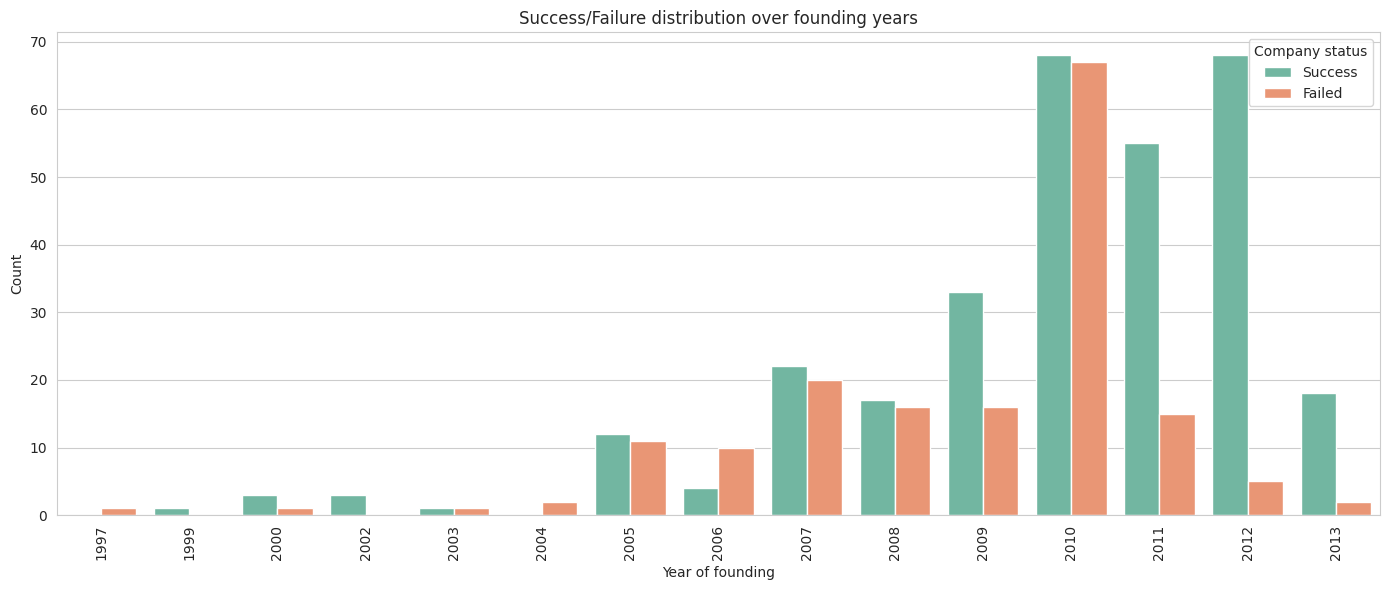

I think this is not just a coincidence. During 2007-2008, a severe financial crisis, known as the[Global Economic Crisis](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis) (GEC), affected the entire world. This crisis was the most significant global economic downturn since the Great Depression.
<br> Here we see that after the wave of crisis there were a lot of failed startups in the first years(not  2007 and 2008 but 2009 and 2010 cause an economic crisis doesnt just happen immediately in all fields of economy). After that we see a lot of progress and companies founded in 2011 or later tend to be more successful. To back up my thoughts I will show you a research on startups in USA.

## Number of jobs created by start-up businesses that were less than one year old in the United States from 1994 to 2022

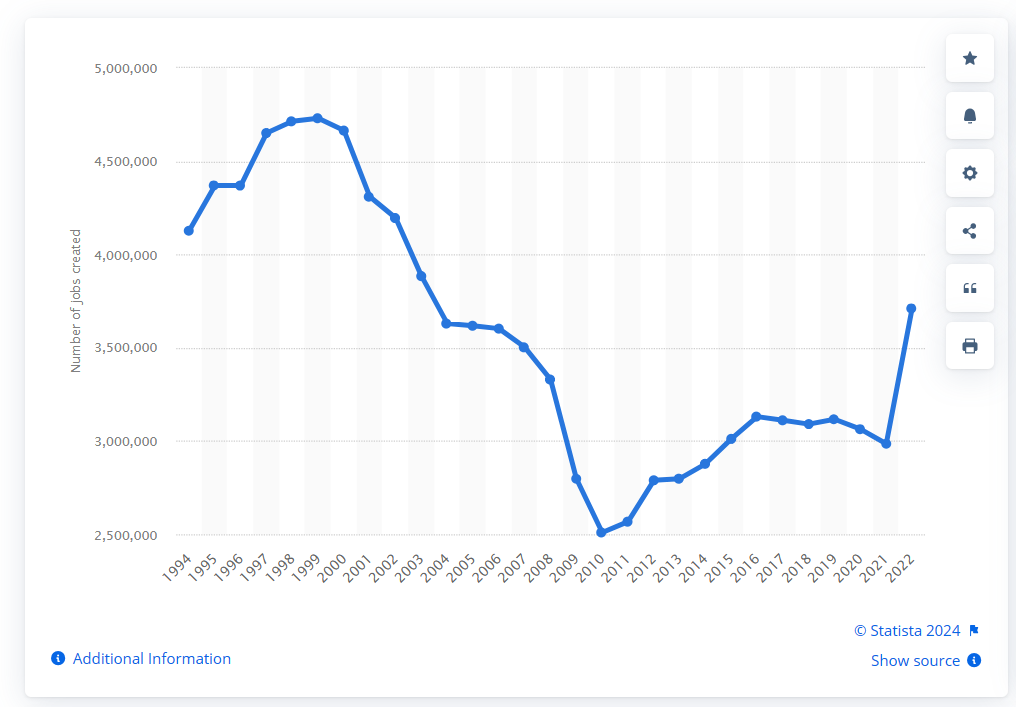

Here you can see that we get a lot of correlation with our data.There were not created enough jobs  and thus startups failed.
<br>The original publication is [here](https://www.statista.com/statistics/235515/jobs-created-by-start-ups-in-the-us/).
